#**Simple Reflex Agent**

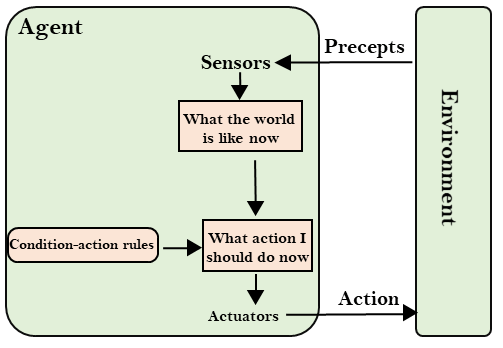

In [ ]:
#we need 2 classes Environment and Agent and 1 Simulation Function

class Environment:
  pass


class Agent:
  pass


def agent_simulation(agent, environment):
  pass




In [ ]:
class Environment:
    def __init__(self, initial_state):
        self.initial_state = initial_state #Initial state could be fixed or random

    def get_percept(self):
      #initial condition of environment , that would be perceived by agent
      pass

    def effect_on_environment(self):
        self.state = 'Taskdone'


class SimpleReflexAgent:
    def __init__(self):
        pass

    def act(self, percept):
        #Determine action based on the initial percept
        pass


def run_agent(agent, environment):
    # The agent reacts to the initial stimulus/Percept
    percept = environment.get_percept()
    action = agent.act(percept)
    print(f"Percept: {percept}, Action: {action}")


# Create instances of agent and environment
agent = SimpleReflexAgent()
environment = Environment(initial_state=0)  # Start with any initial condition (high/low , 1/0, True/False , high/med/low etc based on scenario)

# Run the agent in the environment (only once)
run_agent(agent, environment)


#**Simple Reflex-Based Hand-Pulling Agent: Code1**

Imagine a robot or an automated hand safety system designed to detect the heat level of objects and prevent harm by retracting upon touching dangerously hot surfaces. This system uses a reflex agent to make immediate decisions based on perceptual input from the environment.

In [ ]:
class Environment:
    def __init__(self, heat_level='High'):
        self.heat_level = heat_level

    def get_percept(self):
        """Return the heat level of the object as the percept."""
        return 'Hot' if self.heat_level == 'High' else 'Cool'


class SimpleReflexAgent:
    def __init__(self):
        pass

    def act(self, percept):
        """Determine action based on the percept (heat level)."""
        if percept == 'Hot':
            return 'Pull hand away, you touched the hot object'
        else:
            return 'You have not touched any hot object , No need to pull away'


def run_agent(agent, environment):
    # The agent reacts to the heat stimulus only once
    percept = environment.get_percept()
    action = agent.act(percept)
    print(f"Percept: {percept}, Action: {action}")


# Create instances of agent and environment
agent = SimpleReflexAgent()
environment = Environment()  # Start with a hot object

# Run the agent in the environment (only once)
run_agent(agent, environment)


Percept: Hot, Action: Pull hand away, you touched the hot object


#Example # 2 (Vaccumm Cleaner)

In [ ]:


class Environment:
    def __init__(self, state='Dirty'):
        self.state = state

    def get_percept(self):
        return self.state

    def clean_room(self):
        self.state = 'Clean'


class SimpleReflexAgent:
    def __init__(self):
        pass

    def act(self, percept):
        if percept == 'Dirty':
            return 'Clean the room'
        else:
            return 'Room is clean'


def run_agent(agent, environment, steps):
    for step in range(steps):
        percept = environment.get_percept()
        action = agent.act(percept)
        print(f"Step {step + 1}: Percept - {percept}, Action - {action}")
        if percept == 'Dirty':
            environment.clean_room()


# Create instances of agent and environment
agent = SimpleReflexAgent()
environment = Environment()

# Run the agent in the environment for 5 steps
run_agent(agent, environment, 5)


Step 1: Percept - Dirty, Action - Clean the room
Step 2: Percept - Clean, Action - Room is clean
Step 3: Percept - Clean, Action - Room is clean
Step 4: Percept - Clean, Action - Room is clean
Step 5: Percept - Clean, Action - Room is clean


In [ ]:
#another method using Inheritance (another logic)

class Environment:
    def __init__(self, state='Dirty'):
        self.state = state

    def get_percept(self):
        return self.state

    def clean_room(self):
        self.state = 'Clean'

    def run_agent(self, agent, steps):
        """Simulates the environment interacting with the agent."""
        for step in range(steps):
            percept = self.get_percept()
            action = agent.act(percept)
            print(f"Step {step + 1}: Percept - {percept}, Action - {action}")
            if percept == 'Dirty':
                self.clean_room()

class Agent(Environment):  # Inheriting from Environment
    def __init__(self, state='Dirty'):
        super().__init__(state)  # Initialize environment state

    def act(self, percept):
        """Define the agent's action based on percept."""
        if percept == 'Dirty':
            return 'Clean the room'
        else:
            return 'Room is clean'

# Create an agent instance (inherits from Environment)
agent = Agent()

# Run the agent in the environment for 5 steps
agent.run_agent(agent, 5)


Step 1: Percept - Dirty, Action - Clean the room
Step 2: Percept - Clean, Action - Room is clean
Step 3: Percept - Clean, Action - Room is clean
Step 4: Percept - Clean, Action - Room is clean
Step 5: Percept - Clean, Action - Room is clean


#Example 3 Simple Reflex Agent Code Example #3 (2D Grid-Based Vacuum Cleaner Simulation: Smart Cleaning Robot (Reflex Baed))

In [ ]:
class SimpleReflexAgent:
    def __init__(self):
        self.position = 0  # Start at position 0 (top-left corner)

    def act(self, percept):
        # If the current position is dirty, clean it
        if percept == 'Dirty':
            return 'Clean the room'
        else:
            return 'Move to the next room'

    def move(self):
        # Move to the next position in the grid
        if self.position < 8:  # Stay within bounds of the grid
            self.position += 1
        return self.position


class Environment:
    def __init__(self):
        # Create the environment with a 3x3 grid, where 'Dirty' and 'Clean' states are defined
        self.grid = ['Clean', 'Dirty', 'Clean',
                     'Clean', 'Dirty', 'Dirty',
                     'Clean', 'Clean', 'Clean']

    def get_percept(self, position):
        # Return the state of the current position
        return self.grid[position]

    def clean_room(self, position):
        # Clean the room at the given position
        self.grid[position] = 'Clean'

    def display_grid(self, agent_position):
        # Display the current state of the grid in a 3x3 format
        print("\nCurrent Grid State:")
        grid_with_agent = self.grid[:]  # Copy the grid
        grid_with_agent[agent_position] = "👽"  # Place the agent at the current position
        for i in range(0, 9, 3):
            print(" | ".join(grid_with_agent[i:i + 3]))
        print()  # Extra line for spacing


def run_agent(agent, environment, steps):
    for step in range(steps):
        percept = environment.get_percept(agent.position)
        action = agent.act(percept)
        print(f"Step {step + 1}: Position {agent.position} -> Percept - {percept}, Action - {action}")

        # If the room is dirty, clean it
        if percept == 'Dirty':
            environment.clean_room(agent.position)

        # Display the grid state with the agent's position
        environment.display_grid(agent.position)

        # Move to the next position
        agent.move()


# Create instances of agent and environment
agent = SimpleReflexAgent()
environment = Environment()

# Run the agent in the environment for 9 steps (to cover the 3x3 grid)
run_agent(agent, environment, 9)


#**Model Based Reflex Agent**

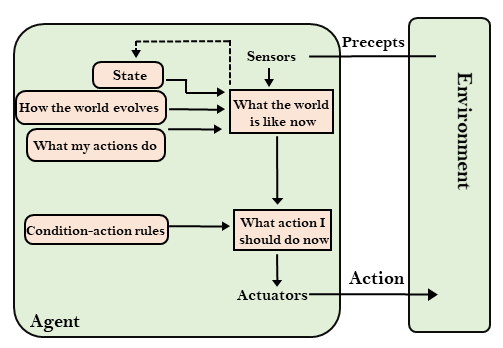

#Model Based Agent Code Example #1 (Vacuum Cleaner)

In [ ]:
l=[9.9,99]
d={'name':'mehak'}
d.

In [ ]:
class ModelBasedAgent:
    def __init__(self):
        self.model = {}

    def update_model(self, percept):
        self.model['current'] = percept
        print(self.model)


    def predict_action(self):
        if self.model['current'] == 'Dirty':
            return 'Clean the room'
        else:
            return 'Room is clean'

    def act(self, percept):
        self.update_model(percept)
        return self.predict_action()


class Environment:
    def __init__(self, state='Dirty'):
        self.state = state

    def get_percept(self):
        return self.state

    def clean_room(self):
        self.state = 'Clean'


def run_agent(agent, environment, steps):
    for step in range(steps):
        percept = environment.get_percept()
        action = agent.act(percept)
        print(f"Step {step + 1}: Percept - {percept}, Action - {action}")
        if percept == 'Dirty':
            environment.clean_room()


# Create instances of agent and environment
agent = ModelBasedAgent()
environment = Environment()

# Run the agent in the environment for 5 steps
run_agent(agent, environment, 5)


{'current': 'Dirty'}
Step 1: Percept - Dirty, Action - Clean the room
{'current': 'Clean'}
Step 2: Percept - Clean, Action - Room is clean
{'current': 'Clean'}
Step 3: Percept - Clean, Action - Room is clean
{'current': 'Clean'}
Step 4: Percept - Clean, Action - Room is clean
{'current': 'Clean'}
Step 5: Percept - Clean, Action - Room is clean


#Example 3 Simple Reflex Agent Code Example #3 (2D Grid-Based Vacuum Cleaner Simulation: Smart Cleaning Robot (Model Baed))

In [ ]:
class SimpleReflexAgent:
    def __init__(self):
        self.position = 0  # Start at position 0 (top-left corner)
        self.environment_model = ['Clean', 'Dirty', 'Clean',
                                  'Clean', 'Dirty', 'Dirty',
                                  'Clean', 'Clean', 'Clean']  # Initial model of the environment

    def act(self, percept):
        # If the current position is dirty, clean it
        if percept == 'Dirty':
            self.environment_model[self.position] = 'Clean'  # Clean the environment model
            return 'Clean the room'
        else:
            return 'Room is clean'

    def move(self):
        # Move to the next position in the grid
        if self.position < 8:
            self.position += 1
        return self.position

    def update_model(self, position, percept):
        # Update the agent's internal model with the percept
        self.environment_model[position] = percept

    def get_model(self):
        return self.environment_model


class Environment:
    def __init__(self):
        # Create the environment with a 3x3 grid, where 'b', 'e', and 'f' are dirty
        self.grid = ['Clean', 'Dirty', 'Clean',
                     'Clean', 'Dirty', 'Dirty',
                     'Clean', 'Clean', 'Clean']

    def get_percept(self, position):
        # Return the state of the current position
        return self.grid[position]

    def clean_room(self, position):
        # Clean the room at the given position
        self.grid[position] = 'Clean'

    def display_grid(self, agent_position):
        # Display the current state of the grid in a 3x3 format
        print("\nCurrent Grid State:")
        grid_with_agent = self.grid[:]  # Copy the grid
        grid_with_agent[agent_position] = "👽"  # Place the agent at the current position
        for i in range(0, 9, 3):
            print(" | ".join(grid_with_agent[i:i + 3]))
        print()  # Extra line for spacing


def run_agent(agent, environment, steps):
    for step in range(steps):
        percept = environment.get_percept(agent.position)
        action = agent.act(percept)
        print(f"Step {step + 1}: Position {agent.position} -> Percept - {percept}, Action - {action}")

        # Update agent's internal model based on percept
        agent.update_model(agent.position, percept)

        # Display the grid state with agent's position
        environment.display_grid(agent.position)

        if percept == 'Dirty':
            environment.clean_room(agent.position)

        agent.move()


# Create instances of agent and environment
agent = SimpleReflexAgent()
environment = Environment()

# Run the agent in the environment for 9 steps (to cover the 3x3 grid)
run_agent(agent, environment, 9)


Step 1: Position 0 -> Percept - Clean, Action - Room is clean

Current Grid State:
👽 | Dirty | Clean
Clean | Dirty | Dirty
Clean | Clean | Clean

Step 2: Position 1 -> Percept - Dirty, Action - Clean the room

Current Grid State:
Clean | 👽 | Clean
Clean | Dirty | Dirty
Clean | Clean | Clean

Step 3: Position 2 -> Percept - Clean, Action - Room is clean

Current Grid State:
Clean | Clean | 👽
Clean | Dirty | Dirty
Clean | Clean | Clean

Step 4: Position 3 -> Percept - Clean, Action - Room is clean

Current Grid State:
Clean | Clean | Clean
👽 | Dirty | Dirty
Clean | Clean | Clean

Step 5: Position 4 -> Percept - Dirty, Action - Clean the room

Current Grid State:
Clean | Clean | Clean
Clean | 👽 | Dirty
Clean | Clean | Clean

Step 6: Position 5 -> Percept - Dirty, Action - Clean the room

Current Grid State:
Clean | Clean | Clean
Clean | Clean | 👽
Clean | Clean | Clean

Step 7: Position 6 -> Percept - Clean, Action - Room is clean

Current Grid State:
Clean | Clean | Clean
Clean | Clean | 

#3.2.2 Model Based Agent Code Example #2 (Closing Window When it Starts to Rain)

In [ ]:
class Environment:
    def __init__(self, rain='No', windows_open='Open'):
        self.rain = rain
        self.windows_open = windows_open

    def get_percept(self):
        """Returns the current percept (rain status and window status)."""
        return {'rain': self.rain, 'windows_open': self.windows_open}

    def close_windows(self):
        """Closes the windows if they are open."""
        if self.windows_open == 'Open':
            self.windows_open = 'Closed'


class ModelBasedAgent:
    def __init__(self):
        self.model = {'rain': 'No', 'windows_open': 'Open'}

    def act(self, percept):
        """Decides action based on the model and current percept."""
        # Update the model with the current percept
        self.model.update(percept)

        # Check the model to decide action
        if self.model['rain'] == 'Yes' and self.model['windows_open'] == 'Open':
            return 'Close the windows'
        else:
            return 'No action needed'

def run_agent(agent, environment, steps):
    for step in range(steps):
        # Get the current percept from the environment
        percept = environment.get_percept()

        # Agent makes a decision based on the current percept
        action = agent.act(percept)

        # Print the current percept and the agent's action
        print(f"Step {step + 1}: Percept - {percept}, Action - {action}")

        # If the agent decided to close the windows, update the environment
        if action == 'Close the windows':
            environment.close_windows()

# Create instances of agent and environment
agent = ModelBasedAgent()
environment = Environment(rain='Yes', windows_open='Open')  # It's raining and windows are open

# Run the agent in the environment for 5 steps
run_agent(agent, environment, 5)


Step 1: Percept - {'rain': 'Yes', 'windows_open': 'Open'}, Action - Close the windows
Step 2: Percept - {'rain': 'Yes', 'windows_open': 'Closed'}, Action - No action needed
Step 3: Percept - {'rain': 'Yes', 'windows_open': 'Closed'}, Action - No action needed
Step 4: Percept - {'rain': 'Yes', 'windows_open': 'Closed'}, Action - No action needed
Step 5: Percept - {'rain': 'Yes', 'windows_open': 'Closed'}, Action - No action needed


#**Goal Based Reflex Agent**

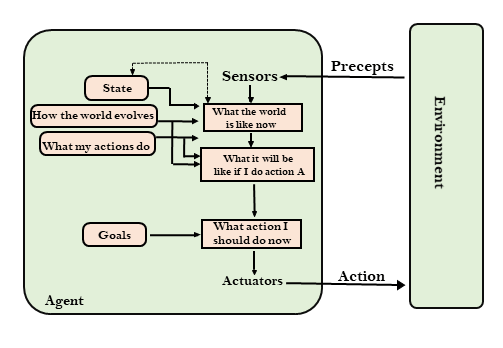

In [ ]:
class GoalBasedAgent:
    def __init__(self):
        self.goal = 'Clean'

    def formulate_goal(self, percept):
        if percept == 'Dirty':
            self.goal = 'Clean'
        else:
            self.goal = 'No action needed'

    def act(self, percept):
        self.formulate_goal(percept)
        if self.goal == 'Clean':
            return 'Clean the room'
        else:
            return 'Room is clean'


class Environment:
    def __init__(self, state='Dirty'):
        self.state = state

    def get_percept(self):
        return self.state

    def clean_room(self):
        self.state = 'Clean'


def run_agent(agent, environment, steps):
    for step in range(steps):
        percept = environment.get_percept()
        action = agent.act(percept)
        print(f"Step {step + 1}: Percept - {percept}, Action - {action}")
        if percept == 'Dirty':
            environment.clean_room()


# Create instances of agent and environment
agent = GoalBasedAgent()
environment = Environment()

# Run the agent in the environment for 5 steps
run_agent(agent, environment, 5)


Step 1: Percept - Dirty, Action - Clean the room
Step 2: Percept - Clean, Action - Room is clean
Step 3: Percept - Clean, Action - Room is clean
Step 4: Percept - Clean, Action - Room is clean
Step 5: Percept - Clean, Action - Room is clean


#**Utility Based Agent**

#3.4.2 Vaccumm Cleaner

In [ ]:
class UtilityBasedAgent:
    def __init__(self):
        self.utility = {'Dirty': -10, 'Clean': 10}

    def calculate_utility(self, percept):
        return self.utility[percept]

    def select_action(self, percept):
        if percept == 'Dirty':
            return 'Clean the room'
        else:
            return 'No action needed'

    def act(self, percept):
        action = self.select_action(percept)
        return action


class Environment:
    def __init__(self, state='Dirty'):
        self.state = state

    def get_percept(self):
        return self.state

    def clean_room(self):
        self.state = 'Clean'


def run_agent(agent, environment, steps):
    total_utility = 0
    for step in range(steps):
        percept = environment.get_percept()
        action = agent.act(percept)
        utility = agent.calculate_utility(percept)
        print(f"Step {step + 1}: Percept - {percept}, Action - {action}, Utility - {utility}")
        total_utility += utility
        if percept == 'Dirty':
            environment.clean_room()
    print("Total Utility:", total_utility)


# Create instances of agent and environment
agent = UtilityBasedAgent()
environment = Environment()

# Run the agent in the environment for 5 steps
run_agent(agent, environment, 5)


Step 1: Percept - Dirty, Action - Clean the room, Utility - -10
Step 2: Percept - Clean, Action - No action needed, Utility - 10
Step 3: Percept - Clean, Action - No action needed, Utility - 10
Step 4: Percept - Clean, Action - No action needed, Utility - 10
Step 5: Percept - Clean, Action - No action needed, Utility - 10
Total Utility: 30


#3.4.2 Utility Based Agent Code Example # 2 (Choosing a Movie to Watch)

In [ ]:
class Environment:
    def __init__(self, movies=None):
        if movies is None:
            movies = {'Movie A': 8, 'Movie B': 6, 'Movie C': 9}
        self.movies = movies

    def get_percept(self):
        """Returns the list of movies and their review scores."""
        return self.movies


class UtilityBasedAgent:
    def __init__(self, mood_factor=0.7):
        self.mood_factor = mood_factor

    def utility(self, review):
        """Compute utility based on review score and mood factor."""
        return review * self.mood_factor

    def act(self, percept):
        """Decides which movie to watch based on utility and displays calculations."""
        best_movie = None
        best_utility = -float('inf')

        print("Utility Calculations:")
        for movie, review in percept.items():
            movie_utility = self.utility(review)
            print(f"  {movie}: Review Score = {review}, Utility = {movie_utility:.2f}")
            if movie_utility > best_utility:
                best_movie = movie
                best_utility = movie_utility

        return best_movie


def run_agent(agent, environment):
    percept = environment.get_percept()
    best_choice = agent.act(percept)
    print(f"\nAvailable Movies: {percept}")
    print(f"Best Movie to Watch: {best_choice}")


# Create instances of agent and environment
agent = UtilityBasedAgent(mood_factor=0.8)
environment = Environment({'Movie A': 7, 'Movie B': 9, 'Movie C': 5})

# Run the agent in the environment
run_agent(agent, environment)


Utility Calculations:
  Movie A: Review Score = 7, Utility = 5.60
  Movie B: Review Score = 9, Utility = 7.20
  Movie C: Review Score = 5, Utility = 4.00

Available Movies: {'Movie A': 7, 'Movie B': 9, 'Movie C': 5}
Best Movie to Watch: Movie B


#**Learning Agent**

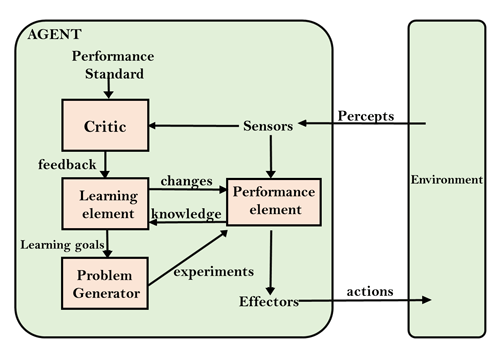

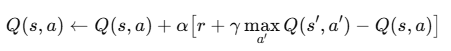

In [ ]:
import random

class LearningBasedAgent:
    def __init__(self, actions):
        self.Q = {}
        self.actions = actions
        self.alpha = 0.1  # Learning rate
        self.gamma = 0.9  # Discount factor
        self.epsilon = 0.1  # Exploration rate

    def get_Q_value(self, state, action):
        return self.Q.get((state, action), 0.0)

    # def select_action(self, state):
    #     if random.uniform(0, 1) < self.epsilon:
    #         return random.choice(self.actions)
    #     else:
    #         return max(self.actions, key=lambda a: self.get_Q_value(state, a))

    def learn(self, state, action, reward, next_state):
        old_Q = self.get_Q_value(state, action)
        best_future_Q = max([self.get_Q_value(next_state, a) for a in self.actions])
        self.Q[(state, action)] = old_Q + self.alpha * (reward + self.gamma * best_future_Q - old_Q)

    def act(self, state):
        action = self.select_action(state)
        return action

class Environment:
    def __init__(self, state='Dirty'):
        self.state = state

    def get_percept(self):
        return self.state

    def clean_room(self):
        self.state = 'Clean'
        return 10

    def no_action_reward(self):
        return 0

def run_agent(agent, environment, steps):
    for step in range(steps):
        percept = environment.get_percept()
        action = agent.act(percept)
        if percept == 'Dirty':
            reward = environment.clean_room()
            print(f"Step {step + 1}: Percept - {percept}, Action - {action}, Reward - {reward}")
        else:
            reward = environment.no_action_reward()
            print(f"Step {step + 1}: Percept - {percept}, Action - {action}, Reward - {reward}")
        next_percept = environment.get_percept()
        agent.learn(percept, action, reward, next_percept)


# Create instances of agent and environment
agent = LearningBasedAgent(['Clean the room', 'No action needed'])
environment = Environment()

# Run the agent in the environment for 5 steps
run_agent(agent, environment, 5)


#============================== TASKS ==================

#**Task #1**

A company’s security system consists of nine critical components (A through I). Each component can be either safe or vulnerable due to security flaws. A security agent is responsible for scanning the entire system, identifying vulnerabilities, and patching them to prevent attacks.

You are tasked with simulating a cybersecurity exercise using the given environment and agent. Complete the following steps:

**Initial System Check:**

The system environment is initialized with random vulnerabilities. Display the initial state of the system, showing which components are safe and which are vulnerable.

**System Scan:**

The security agent scans each component. If a component is vulnerable, the agent logs a warning and adds it to a list for patching. If it is secure, a success message is logged.

**Patching Vulnerabilities:**

After the scan, the agent patches all vulnerable components, marking them as safe. Display messages indicating which components have been patched.

Final System Check:
**bold text**
Display the system’s final state, confirming that all vulnerabilities have been patched.

In [ ]:
import random

class SystemEnvironment:
    def __init__(self):
        # Define a grid simulating system components with potential vulnerabilities
        self.grid = {
            'Component A': random.choice(['Safe', 'Vulnerable']),
            'Component B': random.choice(['Safe', 'Vulnerable']),
            'Component C': random.choice(['Safe', 'Vulnerable']),
            'Component D': random.choice(['Safe', 'Vulnerable']),
            'Component E': random.choice(['Safe', 'Vulnerable']),
            'Component F': random.choice(['Safe', 'Vulnerable']),
            'Component G': random.choice(['Safe', 'Vulnerable']),
            'Component H': random.choice(['Safe', 'Vulnerable']),
            'Component I': random.choice(['Safe', 'Vulnerable']),
        }

    def display_environment(self):
        """Displays the current state of the environment."""
        print("\nSystem Vulnerability Environment:")
        for component, status in self.grid.items():
            vulnerability_status = "❌ Vulnerable" if status == "Vulnerable" else "✅ Safe"
            print(f"{component}: {vulnerability_status}")

class SecurityAgent:
    def __init__(self, environment):
        self.environment = environment
        self.vulnerabilities_found = []

    def scan_system(self):
        """Scans the system for vulnerabilities."""
        print("\n🔍 Scanning for vulnerabilities...")
        for component, status in self.environment.grid.items():
            if status == "Vulnerable":
                print(f"⚠️ Vulnerability detected in {component}!")
                self.vulnerabilities_found.append(component)
            else:
                print(f"✅ {component} is secure.")
        print("\nScan complete.")

    def patch_vulnerabilities(self):
        """Patches all detected vulnerabilities."""
        print("\n🛠 Patching vulnerabilities...")
        for component in self.vulnerabilities_found:
            self.environment.grid[component] = "Safe"
            print(f"✅ {component} has been patched.")
        self.vulnerabilities_found.clear()
        print("\nAll vulnerabilities have been patched.")

# Example usage
environment = SystemEnvironment()
security_agent = SecurityAgent(environment)

# Display initial environment
environment.display_environment()

# Agent scans for vulnerabilities
security_agent.scan_system()

# Agent patches the vulnerabilities
security_agent.patch_vulnerabilities()

# Display the updated environment
environment.display_environment()



System Vulnerability Environment:
Component A: ❌ Vulnerable
Component B: ✅ Safe
Component C: ✅ Safe
Component D: ✅ Safe
Component E: ✅ Safe
Component F: ❌ Vulnerable
Component G: ❌ Vulnerable
Component H: ✅ Safe
Component I: ✅ Safe

🔍 Scanning for vulnerabilities...
⚠️ Vulnerability detected in Component A!
✅ Component B is secure.
✅ Component C is secure.
✅ Component D is secure.
✅ Component E is secure.
⚠️ Vulnerability detected in Component F!
⚠️ Vulnerability detected in Component G!
✅ Component H is secure.
✅ Component I is secure.

Scan complete.

🛠 Patching vulnerabilities...
✅ Component A has been patched.
✅ Component F has been patched.
✅ Component G has been patched.

All vulnerabilities have been patched.

System Vulnerability Environment:
Component A: ✅ Safe
Component B: ✅ Safe
Component C: ✅ Safe
Component D: ✅ Safe
Component E: ✅ Safe
Component F: ✅ Safe
Component G: ✅ Safe
Component H: ✅ Safe
Component I: ✅ Safe


#Task 2

In [ ]:
import random

class ServerEnvironment:
    def __init__(self):
        self.servers = {
            'Server 1': random.choice(['Underloaded', 'Balanced', 'Overloaded']),
            'Server 2': random.choice(['Underloaded', 'Balanced', 'Overloaded']),
            'Server 3': random.choice(['Underloaded', 'Balanced', 'Overloaded']),
            'Server 4': random.choice(['Underloaded', 'Balanced', 'Overloaded']),
            'Server 5': random.choice(['Underloaded', 'Balanced', 'Overloaded']),
        }

    def display_environment(self):
        print("\nSystem Load Status:")
        for server, status in self.servers.items():
            print(f"{server}: {status}")

class LoadBalancerAgent:
    def __init__(self, environment):
        self.environment = environment

    def balance_load(self):
        print("\nBalancing load across servers...")
        for server, status in self.environment.servers.items():
            if status == 'Overloaded':
                print(f"⚠️ {server} is overloaded! Redistributing tasks...")
                self.environment.servers[server] = 'Balanced'
            elif status == 'Underloaded':
                print(f"✅ {server} is underloaded, no action needed.")
        print("\nLoad balancing complete.")

# Example usage
environment = ServerEnvironment()
load_balancer = LoadBalancerAgent(environment)

environment.display_environment()
load_balancer.balance_load()
environment.display_environment()



System Load Status:
Server 1: Overloaded
Server 2: Overloaded
Server 3: Overloaded
Server 4: Underloaded
Server 5: Overloaded

Balancing load across servers...
⚠️ Server 1 is overloaded! Redistributing tasks...
⚠️ Server 2 is overloaded! Redistributing tasks...
⚠️ Server 3 is overloaded! Redistributing tasks...
✅ Server 4 is underloaded, no action needed.
⚠️ Server 5 is overloaded! Redistributing tasks...

Load balancing complete.

System Load Status:
Server 1: Balanced
Server 2: Balanced
Server 3: Balanced
Server 4: Underloaded
Server 5: Balanced


#Task 3

A network of servers has a set of backup tasks that need to be completed regularly. Some backups are successful, while others fail. The Backup Management Agent is responsible for ensuring all failed backups are retried and completed.

Task:
Create a list of backup tasks with either "Completed" or "Failed" statuses.
The Backup Management Agent scans for failed backups and retries them.
After retrying, display the updated task statuses.

In [ ]:
import random

class BackupEnvironment:
    def __init__(self):
        self.backups = {
            f'Backup Task {i}': random.choice(['Completed', 'Failed']) for i in range(1, 11)
        }

    def display_backups(self):
        print("\nBackup Task Status:")
        for task, status in self.backups.items():
            print(f"{task}: {status}")

class BackupManagementAgent:
    def __init__(self, environment):
        self.environment = environment

    def manage_backups(self):
        print("\nManaging backup tasks...")
        for task, status in self.environment.backups.items():
            if status == 'Failed':
                print(f"⚠️ {task} failed. Retrying...")
                self.environment.backups[task] = 'Completed'
        print("\nBackup management complete.")

# Example usage
environment = BackupEnvironment()
backup_agent = BackupManagementAgent(environment)

environment.display_backups()
backup_agent.manage_backups()
environment.display_backups()


#Task 4 utility

A cybersecurity exercise is being conducted for a company’s security system, which consists of nine critical components (A through I). Each component of the system can either be Safe or have Vulnerabilities of varying severity. The company wants to ensure that its system remains secure, but it only has access to a basic security service that can patch Low Risk Vulnerabilities. High Risk Vulnerabilities require purchasing a premium security service to patch.

In this scenario, the goal is to simulate how a Utility-Based Security Agent scans and patches the system based on the vulnerabilities detected and the available resources (limited patching service).

**Initial System Check:**

Initialize the system environment with random vulnerabilities (Safe, Low Risk Vulnerable, and High Risk Vulnerable).
Display the initial state of the system, showing which components are Safe and which have Vulnerabilities.

**System Scan:**

The security agent will scan each component.
If a component is Vulnerable, the agent logs a warning.
If it is Safe, a success message is logged.

**Patching Vulnerabilities:**

The agent will patch all Low Risk Vulnerabilities.
The agent will log a message for High Risk Vulnerabilities indicating the need for premium service to patch them.

**Final System Check:**

Display the system’s final state to confirm that all Low Risk Vulnerabilities have been patched.
The High Risk Vulnerabilities will remain unresolved unless the premium service is purchased.

In [ ]:
import random

class SystemEnvironment:
    def __init__(self):
        # Define a grid simulating system components with different vulnerabilities
        self.grid = {
            'Component A': random.choice(['Safe', 'Low Risk Vulnerable', 'High Risk Vulnerable']),
            'Component B': random.choice(['Safe', 'Low Risk Vulnerable', 'High Risk Vulnerable']),
            'Component C': random.choice(['Safe', 'Low Risk Vulnerable', 'High Risk Vulnerable']),
            'Component D': random.choice(['Safe', 'Low Risk Vulnerable', 'High Risk Vulnerable']),
            'Component E': random.choice(['Safe', 'Low Risk Vulnerable', 'High Risk Vulnerable']),
            'Component F': random.choice(['Safe', 'Low Risk Vulnerable', 'High Risk Vulnerable']),
            'Component G': random.choice(['Safe', 'Low Risk Vulnerable', 'High Risk Vulnerable']),
            'Component H': random.choice(['Safe', 'Low Risk Vulnerable', 'High Risk Vulnerable']),
            'Component I': random.choice(['Safe', 'Low Risk Vulnerable', 'High Risk Vulnerable']),
        }

    def display_environment(self):
        """Displays the current state of the environment."""
        print("\nSystem Vulnerability Environment:")
        for component, status in self.grid.items():
            vulnerability_status = f"🔒 {status}" if status != 'Safe' else "✅ Safe"
            print(f"{component}: {vulnerability_status}")

class SecurityAgent:
    def __init__(self, environment):
        self.environment = environment
        self.vulnerabilities_found = []

    def utility(self):
        """Calculates utility as the sum of vulnerabilities' importance in the system."""
        utility_value = 0
        for status in self.environment.grid.values():
            if status == 'Low Risk Vulnerable':
                utility_value += 1  # Low risk vulnerabilities can be patched (utility = 1)
            elif status == 'High Risk Vulnerable':
                utility_value += 3  # High risk vulnerabilities (requires premium service)
        return utility_value

    def scan_system(self):
        """Scans the system for vulnerabilities and calculates utility."""
        print("\n🔍 Scanning for vulnerabilities...")
        for component, status in self.environment.grid.items():
            if status == 'Low Risk Vulnerable':
                print(f"⚠️ Low Risk Vulnerability detected in {component}!")
                self.vulnerabilities_found.append(component)
            elif status == 'High Risk Vulnerable':
                print(f"⚠️ High Risk Vulnerability detected in {component}. You need to purchase premium service to patch.")
            else:
                print(f"✅ {component} is secure.")
        print("\nScan complete.")

    def patch_vulnerabilities(self):
        """Patches only low-risk vulnerabilities."""
        print("\n🛠 Patching vulnerabilities...")
        for component in self.vulnerabilities_found:
            self.environment.grid[component] = 'Safe'
            print(f"✅ {component} has been patched (Low Risk).")
        self.vulnerabilities_found.clear()

    def take_action(self):
        """Decides whether to scan or patch based on the utility of actions."""
        print("\nEvaluating system security...")
        current_utility = self.utility()
        if current_utility > 0:
            print(f"Utility is {current_utility}. Vulnerabilities found. Taking action...")
            self.scan_system()  # Scan first
            self.patch_vulnerabilities()  # Patch Low Risk Vulnerabilities
        else:
            print("✅ No vulnerabilities detected. System is secure.")

# Example usage
environment = SystemEnvironment()
security_agent = SecurityAgent(environment)

# Initial system check
print("\n--- Initial System Check ---")
environment.display_environment()

# Agent evaluates the system and takes actions based on utility
security_agent.take_action()

# Final system check
print("\n--- Final System Check ---")
environment.display_environment()



--- Initial System Check ---

System Vulnerability Environment:
Component A: 🔒 High Risk Vulnerable
Component B: ✅ Safe
Component C: 🔒 Low Risk Vulnerable
Component D: ✅ Safe
Component E: ✅ Safe
Component F: 🔒 High Risk Vulnerable
Component G: 🔒 High Risk Vulnerable
Component H: 🔒 Low Risk Vulnerable
Component I: 🔒 High Risk Vulnerable

Evaluating system security...
Utility is 14. Vulnerabilities found. Taking action...

🔍 Scanning for vulnerabilities...
⚠️ High Risk Vulnerability detected in Component A. You need to purchase premium service to patch.
✅ Component B is secure.
⚠️ Low Risk Vulnerability detected in Component C!
✅ Component D is secure.
✅ Component E is secure.
⚠️ High Risk Vulnerability detected in Component F. You need to purchase premium service to patch.
⚠️ High Risk Vulnerability detected in Component G. You need to purchase premium service to patch.
⚠️ Low Risk Vulnerability detected in Component H!
⚠️ High Risk Vulnerability detected in Component I. You need to pu

#Task 5

In a hospital, a delivery robot is tasked with delivering medicines to patients, assisting nurses, and performing other related activities in an efficient manner. The goal of the robot is to automatically move through hospital corridors, pick up medicines, deliver them to the correct patient rooms, and perform various tasks such as scanning patient IDs or alerting staff.

**Components:**
**Agent:** The hospital delivery robot, which can move around, interact with patient rooms, pick up medicines, deliver them, and alert nurses or doctors when needed.

**Environment:** The hospital layout, including:
Corridors
Patient rooms
Nurse stations
Medicine storage areas

**Actions:**
Move to a location (room, station, etc.).
Pick up medicine from storage.
Deliver medicine to the patient’s room.
Scan patient ID for verification.
Alert staff for critical situations.

**Perceptions:**
Room numbers (where the robot should deliver the medicine).
Patient schedules (timing for when patients need their medicines).
Medicine type (specific medicines to be delivered to patients).
Staff availability (alerts if staff assistance is needed).

**Goal-Based Agent Approach:**

**Goal:** Deliver medicine to patients based on a schedule and room number, while ensuring all deliveries are correctly made. The robot must scan the patient's ID before delivering and alert nurses or doctors if needed.


In [ ]:
import random
import time

class HospitalEnvironment:
    def __init__(self):
        self.rooms = {
            'Room 101': {'medicine': 'Painkiller', 'scheduled_time': '08:00 AM'},
            'Room 102': {'medicine': 'Antibiotics', 'scheduled_time': '09:00 AM'},
            'Room 103': {'medicine': 'Insulin', 'scheduled_time': '10:00 AM'},
            'Room 104': {'medicine': 'Cough Syrup', 'scheduled_time': '11:00 AM'},
            'Room 105': {'medicine': 'Vitamins', 'scheduled_time': '12:00 PM'}
        }
        self.medicine_storage = {
            'Painkiller': True,
            'Antibiotics': True,
            'Insulin': True,
            'Cough Syrup': True,
            'Vitamins': True
        }

    def get_room_info(self, room_number):
        """Returns information about the room, including medicine and scheduled time."""
        return self.rooms.get(room_number)

    def update_medicine_stock(self, medicine):
        """Reduces the stock after medicine is delivered."""
        if self.medicine_storage.get(medicine):
            self.medicine_storage[medicine] = False  # Mark medicine as delivered
            print(f"✅ {medicine} has been delivered.")
        else:
            print(f"⚠️ {medicine} is out of stock or already delivered.")

class HospitalRobot:
    def __init__(self, environment):
        self.environment = environment
        self.current_room = None

    def move_to_room(self, room_number):
        """Simulates moving to a room."""
        print(f"🚗 Moving to {room_number}...")
        time.sleep(1)  # Simulate time taken to move
        self.current_room = room_number
        print(f"✅ Arrived at {room_number}.")

    def pick_up_medicine(self, medicine):
        """Simulates picking up medicine from storage."""
        if self.environment.medicine_storage.get(medicine):
            print(f"🧑‍⚕️ Picking up {medicine} from storage...")
            time.sleep(1)
            return medicine
        else:
            print(f"⚠️ {medicine} is not available.")
            return None

    def scan_patient_id(self):
        """Simulate scanning the patient's ID for verification."""
        print("🔒 Scanning patient ID...")
        time.sleep(1)
        print("✅ Patient ID verified.")

    def deliver_medicine(self, medicine, room_number):
        """Deliver the medicine to the correct room after scanning."""
        room_info = self.environment.get_room_info(room_number)
        if room_info:
            print(f"🧑‍⚕️ Delivering {medicine} to {room_number} at {room_info['scheduled_time']}.")
            self.environment.update_medicine_stock(medicine)
            print(f"✅ {medicine} delivered to {room_number}.")
        else:
            print(f"⚠️ Room {room_number} not found.")

    def alert_staff(self):
        """Simulate alerting staff if needed (e.g., for emergencies or after completing deliveries)."""
        print("📢 Alerting staff...")
        time.sleep(1)
        print("✅ Staff has been alerted.")

    def complete_task(self):
        """Complete the task of delivering medicine to a room."""
        print("\n⚙️ Task Start")

        for room_number, info in self.environment.rooms.items():
            print(f"\n📝 Delivering medicine to {room_number}...")
            self.move_to_room(room_number)
            medicine = self.pick_up_medicine(info['medicine'])
            if medicine:
                self.scan_patient_id()
                self.deliver_medicine(medicine, room_number)
            else:
                print(f"❌ Could not deliver {info['medicine']} to {room_number}.")

        print("\n✅ All deliveries complete!")
        self.alert_staff()

# Example usage:
hospital_environment = HospitalEnvironment()
robot = HospitalRobot(hospital_environment)

# Robot starts its task of delivering medicines
robot.complete_task()



⚙️ Task Start

📝 Delivering medicine to Room 101...
🚗 Moving to Room 101...
✅ Arrived at Room 101.
🧑‍⚕️ Picking up Painkiller from storage...
🔒 Scanning patient ID...
✅ Patient ID verified.
🧑‍⚕️ Delivering Painkiller to Room 101 at 08:00 AM.
✅ Painkiller has been delivered.
✅ Painkiller delivered to Room 101.

📝 Delivering medicine to Room 102...
🚗 Moving to Room 102...
✅ Arrived at Room 102.
🧑‍⚕️ Picking up Antibiotics from storage...
🔒 Scanning patient ID...
✅ Patient ID verified.
🧑‍⚕️ Delivering Antibiotics to Room 102 at 09:00 AM.
✅ Antibiotics has been delivered.
✅ Antibiotics delivered to Room 102.

📝 Delivering medicine to Room 103...
🚗 Moving to Room 103...
✅ Arrived at Room 103.
🧑‍⚕️ Picking up Insulin from storage...
🔒 Scanning patient ID...
✅ Patient ID verified.
🧑‍⚕️ Delivering Insulin to Room 103 at 10:00 AM.
✅ Insulin has been delivered.
✅ Insulin delivered to Room 103.

📝 Delivering medicine to Room 104...
🚗 Moving to Room 104...
✅ Arrived at Room 104.
🧑‍⚕️ Picking up C

#Task 6

In [ ]:
class FirefightingEnvironment:
    def __init__(self):
        # Define the 3x3 grid with locations labeled
        self.grid = {
            'a': None, 'b': None, 'c': 'Fire',
            'd': None, 'e': 'Fire', 'f': None,
            'g': None, 'h': None, 'j': 'Fire'
        }
        self.robot_position = 'a'  # Start position of the robot
        self.path = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j']  # Path from 'a' to 'j'

    def display_environment(self):
        """Displays the current state of the environment."""
        print("\nEnvironment Grid:")
        for i, key in enumerate(self.grid.keys(), 1):
            status = "🔥" if self.grid[key] == "Fire" else " "
            end_char = "\n" if i % 3 == 0 else " | "
            print(f"{key} ({status})", end=end_char)
        print("\n")

    def move_robot(self):
        """Moves the robot from 'a' to 'j', checking for fire at each location."""
        print("🚗 Robot starting at 'a' and moving towards 'j'...\n")
        for position in self.path:
            self.robot_position = position
            print(f"Robot moved to {position}.")
            self.sense_fire()

    def sense_fire(self):
        """Checks if the robot is at a fire location."""
        if self.grid[self.robot_position] == "Fire":
            print(f"🔥 Fire detected at {self.robot_position}! Extinguishing...")
            self.extinguish_fire()
        else:
            print(f"✅ No fire detected at {self.robot_position}.")

    def extinguish_fire(self):
        """Extinguishes fire at the current location."""
        self.grid[self.robot_position] = None
        print(f"✅ Fire at {self.robot_position} has been extinguished.\n")

# Example usage
env = FirefightingEnvironment()
env.display_environment()
env.move_robot()
env.display_environment()



Environment Grid:
a ( ) | b ( ) | c (🔥)
d ( ) | e (🔥) | f ( )
g ( ) | h ( ) | j (🔥)


🚗 Robot starting at 'a' and moving towards 'j'...

Robot moved to a.
✅ No fire detected at a.
Robot moved to b.
✅ No fire detected at b.
Robot moved to c.
🔥 Fire detected at c! Extinguishing...
✅ Fire at c has been extinguished.

Robot moved to d.
✅ No fire detected at d.
Robot moved to e.
🔥 Fire detected at e! Extinguishing...
✅ Fire at e has been extinguished.

Robot moved to f.
✅ No fire detected at f.
Robot moved to g.
✅ No fire detected at g.
Robot moved to h.
✅ No fire detected at h.
Robot moved to j.
🔥 Fire detected at j! Extinguishing...
✅ Fire at j has been extinguished.


Environment Grid:
a ( ) | b ( ) | c ( )
d ( ) | e ( ) | f ( )
g ( ) | h ( ) | j ( )




In [ ]:
l=[1,2,3,4,5]
type(l)

list